In [6]:
import pandas as pd

In [1]:
! git clone https://github.com/zachary-m/gc.git
! git clone https://github.com/yoraish/bibrew.git

Cloning into 'gc'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
Cloning into 'bibrew'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 4), reused 22 (delta 2), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [7]:
df = pd.read_pickle("/content/gc/train_test_val.pkl")
df

,src,target,data_type
0,ויהיו שם שדי מואב ויבאו יהודה לחם מבית אפרתים ...,שם ונשארו מואב לארץ באו הם שביהודה לחם בית היא...,test
1,התבן בהיות כאשר ביומו דבר יום מעשיכם כלו לאמר ...,הקש את שקבלתם בזמן יום בכל שעשיתם כמו מעשיכם א...,test
2,ומש וגתר וחול עוץ ארם ובני,ומש וגתר וחול עוץ ארם ובני,test
3,סביב המזבח על קרנות ונתן השעיר ומדם הפר מדם ול...,מסביב המזבח פנות על וישים התיש ומדם הפר מדם וי...,test
4,תעוננו ולא תנחשו על הדם תאכלו,עינים תאחזו ואל תכשפו אל הדם עם בעודו בשר תאכל...,test
...,...,...,...
9217,ישן תאכלו תבואתה עד בוא התשיעת השנה ישן מן התב...,הישנה מהתבואה תאכלו שנה אותה תבואת הגעת התשיעי...,train
9218,במועדם אתם אשר תקראו קדש מקראי יהוה מועדי אלה,בזמנם אותם שתקבעו קודש מאורעות יהוה חגי אלה,train
9219,האחד לאיל עשרנים שני לפר עשרנים שלשה בשמן בלול...,איל לכל ליטר כ6 5 האיפה עשיריות שלוש בשמן מערב...,train
9220,הישראלי ואיש הישראלית בן במחנה וינצו ישראל בני...,במחנה רבו ישראלי ואיש הישראלית של הבן ישראל בנ...,train


If want to get statistics for nikud, run the cell below.

In [ ]:
df = pd.read_pickle("/content/bibrew/train_test_val_nikud.pkl")
df

In [ ]:
df["target_len"] = df["target"].apply(lambda x: len(x))
df["src_len"] = df["src"].apply(lambda x: len(x))


df["target_word"] = df["target"].apply(lambda x: len(x.split(" ")))
df["src_word"] = df["src"].apply(lambda x: len(x.split(" ")))



print("Source Word", df.src_word.sum(), "Target Word", df.target_word.sum())
print("Source chars", df.src_len.sum(), "Target chars", df.target_len.sum())

Source Word 125820 Target Word 139539
Source chars 599173 Target chars 687683


In [ ]:
words_src = set()
words_target = set()
for i, row in df.iterrows():
  words_src.update(row.src.split(" "))
  words_target.update(row.target.split(" "))

print("unique src word", len(words_src))
print("unique Target word", len(words_target))

unique src word 15006
unique Target word 17262


In [ ]:
df

,src,target,data_type,target_len,src_len,target_word,src_word
0,ויהיו שם שדי מואב ויבאו יהודה לחם מבית אפרתים ...,שם ונשארו מואב לארץ באו הם שביהודה לחם בית היא...,test,123,101,26,20
1,התבן בהיות כאשר ביומו דבר יום מעשיכם כלו לאמר ...,הקש את שקבלתם בזמן יום בכל שעשיתם כמו מעשיכם א...,test,89,58,16,11
2,ומש וגתר וחול עוץ ארם ובני,ומש וגתר וחול עוץ ארם ובני,test,26,26,6,6
3,סביב המזבח על קרנות ונתן השעיר ומדם הפר מדם ול...,מסביב המזבח פנות על וישים התיש ומדם הפר מדם וי...,test,93,86,19,18
4,תעוננו ולא תנחשו על הדם תאכלו,עינים תאחזו ואל תכשפו אל הדם עם בעודו בשר תאכל...,test,50,29,11,6
...,...,...,...,...,...,...,...
9217,ישן תאכלו תבואתה עד בוא התשיעת השנה ישן מן התב...,הישנה מהתבואה תאכלו שנה אותה תבואת הגעת התשיעי...,train,93,78,15,15
9218,במועדם אתם אשר תקראו קדש מקראי יהוה מועדי אלה,בזמנם אותם שתקבעו קודש מאורעות יהוה חגי אלה,train,43,45,8,9
9219,האחד לאיל עשרנים שני לפר עשרנים שלשה בשמן בלול...,איל לכל ליטר כ6 5 האיפה עשיריות שלוש בשמן מערב...,train,63,58,12,11
9220,הישראלי ואיש הישראלית בן במחנה וינצו ישראל בני...,במחנה רבו ישראלי ואיש הישראלית של הבן ישראל בנ...,train,91,88,18,17


In [ ]:
src_chars = df.groupby(["data_type"])["src_len"].sum()
target_chars = df.groupby(["data_type"])["target_len"].sum()

table1 = pd.concat([src_chars, target_chars], axis=1).rename(columns={"src_len": "Source Character Count", "target_len": "Target Character Count"})

src_words = df.groupby(["data_type"])["src_word"].sum()
target_words = df.groupby(["data_type"])["target_word"].sum()

table2 = pd.concat([src_words, target_words], axis=1).rename(columns={"src_word": "Source Word Count", "target_word": "Target Word Count"})

print(pd.concat([table2.T, table1.T]).to_latex())

\begin{tabular}{lrrr}
\toprule
data\_type &   test &   train &    val \\
\midrule
Source Word Count      &  12301 &  100855 &  12664 \\
Target Word Count      &  13692 &  111740 &  14107 \\
Source Character Count &  58588 &  480209 &  60376 \\
Target Character Count &  67444 &  550744 &  69495 \\
\bottomrule
\end{tabular}



In [ ]:
for i, df_sup in df.groupby("data_type"):
  print(i)
  words_src = -1
  words_target = -1
  for i, row in df_sup.iterrows():
    words_src = max( words_src, len(row.src.split(" ")))
    words_target = max( words_target, len(row.target.split(" ")))

  print("unique src word", words_src)
  print("unique Target word", words_target)

test
unique src word 43
unique Target word 42
train
unique src word 41
unique Target word 41
val
unique src word 32
unique Target word 36


In [ ]:
from collections import defaultdict

for i, df_sup in df.groupby("data_type"):
  print(i)
  words_src = set()
  words_target = set()
  word_counts_src = defaultdict(lambda :0)
  word_counts_target = defaultdict(lambda :0)

  for i, row in df_sup.iterrows():
    words_list_src = row.src.split(" ")
    words_src.update(words_list_src)
    for w_src in words_list_src:
      word_counts_src[w_src] += 1

    words_list_target = row.target.split(" ")
    words_target.update(words_list_target)
    for w_trg in words_list_target:
      word_counts_target[w_trg] += 1


  print("unique src word", len(words_src), "(", str(len([k for k in word_counts_src if word_counts_src[k] ==1])/len(words_src)*100)[:2], "\\%)")
  print("unique Target word", len(words_target), "(", str(len([k for k in word_counts_target if word_counts_target[k] ==1])/len(words_target)*100)[:2], "\\%)")
  
  print("Single-use words src", len([k for k in word_counts_src if word_counts_src[k] ==1])/len(words_src))
  print("Single-use words target", len([k for k in word_counts_target if word_counts_target[k] ==1])/len(words_target))

test
unique src word 7765 ( 81 \%)
unique Target word 5270 ( 67 \%)
Single-use words src 0.8182871860914359
Single-use words target 0.6755218216318786
train
unique src word 32915 ( 50 \%)
unique Target word 17554 ( 41 \%)
Single-use words src 0.5097979644538964
Single-use words target 0.41927765751395696
val
unique src word 7800 ( 78 \%)
unique Target word 5276 ( 65 \%)
Single-use words src 0.7878205128205128
Single-use words target 0.6567475360121304


In [ ]:
# word frequency


words_src = []
words_target = []
for i, row in df.iterrows():
  words_src.extend(row.src.split(" "))
  words_target.extend(row.target.split(" "))

In [ ]:
pd.Series(words_src).value_counts().sort_values().tail(20)


pandas.core.series.Series

In [ ]:
# Number of words appering once.
import seaborn as sns
import matplotlib.pyplot as plt

one_count = 0
for count in pd.Series(words_src).value_counts().sort_values():
  if count == 1:
    one_count += 1
print("Single Appearance Words in Source", one_count)

one_count = 0
for count in pd.Series(words_target).value_counts().sort_values():
  if count == 1:
    one_count += 1
print("Single Appearance Words in Target", one_count)


Single Appearance Words in Source 15648
Single Appearance Words in Target 6830


In [ ]:
pd.Series(words_target).value_counts().sort_values().tail(20)

לְךָ           559
מֹשֶׁה         567
כְּמוֹ         577
אוֹ            604
בְּנֵי         682
יִשְׂרָאֵל     686
אוֹתָם         711
אֶל            734
לוֹ            759
אָמַר          799
כִּי           921
אוֹתוֹ         955
שֶׁל          1012
לֹא           1063
וְאֶת         1159
הוּא          1470
עַל           1559
כָּל          1626
יהוה          1878
אֶת           5260
dtype: int64

In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3094571 sha256=0714206f778e92477da125206809069eb2684ebc3002115d21ede6731296ae32
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.translate.bleu_score import sentence_bleu

fasttext.util.download_model('he', if_exists='ignore')  # English 
ft = fasttext.load_model('cc.he.300.bin')

In [ ]:
def spatial_distance(row):
  target = ft.get_sentence_vector(row["target"])
  src = ft.get_sentence_vector(row["src"])
  return scipy.spatial.distance.cosine(target, src)


def squared_distance(row):
  target = ft.get_sentence_vector(row["target"])
  src = ft.get_sentence_vector(row["src"])
  return ((target-src)**2).mean()

In [ ]:
df["cosine_distance"] = df.apply(lambda row: spatial_distance(row), axis=1)
df["mean_squared_distance"] = df.apply(lambda row: squared_distance(row), axis=1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


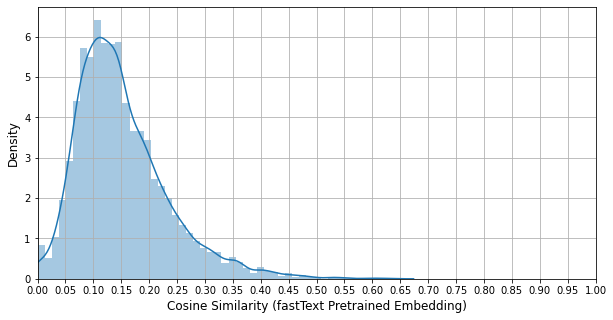

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df["cosine_distance"],ax=ax, kde_kws={'clip': (0.0, 1.0)})
plt.xlim((0,1))
plt.xlabel("Cosine Similarity (fastText Pretrained Embedding)", size=12)
plt.ylabel("Density", size=12)
plt.grid()
plt.xticks(np.arange(0,1.05,.05));
plt.savefig("cosine_similarity.png", dpi=1200)

In [35]:
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def bleu_computation(row):
  target = row["target"]
  src = row["src"]
  # print(src)
  # print(target)
  return sentence_bleu(target, src)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


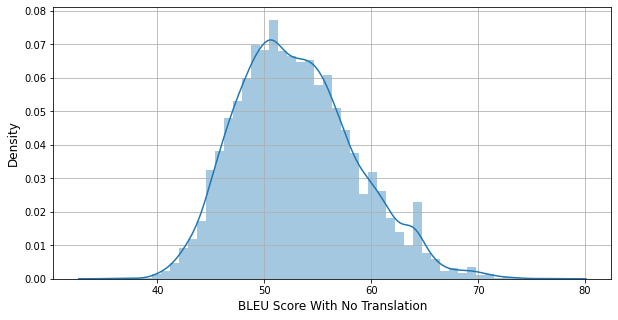

In [40]:
df = pd.read_pickle("/content/gc/train_test_val.pkl")

df["bleu"] = df.apply(lambda row: bleu_computation(row)*100-20, axis=1)
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(df["bleu"], ax=ax)

plt.xlabel("BLEU Score With No Translation", size=12)
plt.ylabel("Density", size=12)
plt.grid()
# plt.xticks(np.arange(0, 0.0025,.00025));
# plt.xlim((0,.0025))

plt.savefig("BLEU_raw.png", dpi=1200)

In [34]:
sentence_bleu(df.iloc[0]["src"], df.iloc[0]["target"])

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.6350109599627048

In [ ]:
df.to_pickle("difference_measure_hebrew.pkl")

In [39]:
df["bleu"].describe()

count    9222.000000
mean       73.032295
std         5.544412
min        55.314464
25%        68.999654
50%        72.542044
75%        76.442705
max        97.400375
Name: bleu, dtype: float64

In [ ]:
df["cosine_distance"].describe()

count    9.222000e+03
mean     1.516456e-01
std      8.265654e-02
min     -1.192093e-07
25%      9.438099e-02
50%      1.364654e-01
75%      1.922383e-01
max      6.338583e-01
Name: cosine_distance, dtype: float64

In [ ]:
df.to_pickle("distances_dist_hebrew.pkl")

In [ ]:
df["cosine_distance"].std()/df["cosine_distance"].mean()

0.5450638439049375

In [ ]:
df["bleu"].std()/df["bleu"].mean()

0.6538079600141495

In [ ]:
(0.6538079600141495-0.5450638439049375)/0.5450638439049375

0.19950711705650712